In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def read_and_remove_columns(file_path, columns_to_remove=None):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Check if columns to remove are provided
    if columns_to_remove:
        # Remove the specified columns
        df = df.drop(columns=columns_to_remove, errors='ignore')

    return df

pokemon_df = read_and_remove_columns('Pokemon.csv', ['#', 'Type 2', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'])
pokemon_df.head(5)

,Name,Type 1,Total,HP,Attack,Defense
0,Bulbasaur,Grass,318,45,49,49
1,Ivysaur,Grass,405,60,62,63
2,Venusaur,Grass,525,80,82,83
3,VenusaurMega Venusaur,Grass,625,80,100,123
4,Charmander,Fire,309,39,52,43


In [ ]:
pokemon_df.describe()

,Total,HP,Attack,Defense
count,800.00000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500
std,119.96304,25.534669,32.457366,31.183501
min,180.00000,1.000000,5.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000
50%,450.00000,65.000000,75.000000,70.000000
75%,515.00000,80.000000,100.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000


In [ ]:
'''
pokemon_df = pokemon_df[~pokemon_df['Name'].str.contains('Mega', na=False)]
pokemon_df = pokemon_df[~pokemon_df['Name'].str.contains('Primal', na=False)]
pokemon_df = pokemon_df[~pokemon_df['Name'].str.contains('White', na=False)]
pokemon_df = pokemon_df[~pokemon_df['Name'].str.contains('Black', na=False)]
pokemon_df = pokemon_df[~pokemon_df['Name'].str.contains('Origin', na=False)]
pokemon_df = pokemon_df[~pokemon_df['Name'].str.contains('Altered', na=False)]
'''

In [ ]:
print(pokemon_df.isnull().any())

Name       False
Type 1     False
Total      False
HP         False
Attack     False
Defense    False
dtype: bool


In [ ]:
print(pokemon_df['Type 1'].unique())

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [ ]:
match_dct = {'Grass': {'x2': ['Water', 'Ground', 'Rock'], 'x1/2': ['Fire', 'Grass', 'Poison', 'Flying', 'Bug', 'Steel', 'Dragon'], 'x0': []},
             'Fire': {'x2': ['Grass', 'Ice', 'Bug', 'Steel'], 'x1/2': ['Water', 'Dragon', 'Rock', 'Fire'], 'x0': []},
             'Water': {'x2': ['Fire', 'Ground', 'Rock'], 'x1/2': ['Grass', 'Water', 'Dragon'], 'x0': []},
             'Bug': {'x2': ['Grass', 'Psychic', 'Dark'], 'x1/2': ['Fire', 'Fighting', 'Poison', 'Flying', 'Ghost', 'Steel', 'Fairy'], 'x0': []},
             'Normal': {'x2': [], 'x1/2': ['Rock', 'Steel'], 'x0': ['Ghost']},
             'Poison': {'x2': ['Grass', 'Fairy'], 'x1/2': ['Poison', 'Ground', 'Rock', 'Ghost'], 'x0': ['Steel']},
             'Electric': {'x2': ['Water', 'Flying'], 'x1/2': ['Dragon', 'Grass', 'Electric'], 'x0': ['Ground']},
             'Ground': {'x2': ['Water', 'Grass', 'Ice'], 'x1/2': ['Poison', 'Rock'], 'x0': ['Flying']},
             'Fairy': {'x2': ['Fighting', 'Dragon', 'Dark'], 'x1/2': ['Fire', 'Poison', 'Steel'], 'x0': []},
             'Fighting': {'x2': ['Normal', 'Ice', 'Rock', 'Dark', 'Steel'], 'x1/2': ['Poison', 'Flying', 'Psychic', 'Bug', 'Fairy'], 'x0': ['Ghost']},
             'Psychic': {'x2': ['Fighting', 'Poison'], 'x1/2': ['Psychic', 'Steel'], 'x0': ['Dark']},
             'Rock': {'x2': ['Fire', 'Ice', 'Flying', 'Bug'], 'x1/2': ['Fighting', 'Ground', 'Steel'], 'x0': []},
             'Ghost': {'x2': ['Ghost', 'Psychic'], 'x1/2': ['Dark'], 'x0': ['Normal']},
             'Ice': {'x2': ['Grass', 'Ground', 'Flying', 'Dragon'], 'x1/2': ['Fire', 'Water', 'Ice', 'Steel'], 'x0': []},
             'Dragon': {'x2': ['Dragon'], 'x1/2': ['Steel'], 'x0': ['Fairy']},
             'Dark': {'x2': ['Psychic', 'Ghost'], 'x1/2': ['Fighting', 'Dark', 'Fairy'], 'x0': []},
             'Steel': {'x2': ['Ice', 'Rock', 'Fairy'], 'x1/2': ['Fire', 'Water', 'Electric', 'Steel'], 'x0': []},
             'Flying': {'x2': ['Grass', 'Fighting', 'Bug'], 'x1/2': ['Electric', 'Rock', 'Steel'], 'x0': []}
             }

In [ ]:
pokemon_df=pokemon_df.head(4)

In [ ]:
pokemon_df

,Name,Type 1,Total,HP,Attack,Defense
0,Bulbasaur,Grass,318,45,49,49
1,Ivysaur,Grass,405,60,62,63
2,Venusaur,Grass,525,80,82,83
3,VenusaurMega Venusaur,Grass,625,80,100,123


In [ ]:
G = nx.DiGraph()

def create_graph(df):
  for _, pokemon1 in df.iterrows():
    G.add_node(pokemon1['Name'])
    for _, pokemon2 in df.iterrows():
      weight = 1
      if pokemon2['Name'] != pokemon1['Name']:
        if pokemon2['Type 1'] in match_dct[pokemon1['Type 1']]['x2']:
          weight = 2
        if pokemon2['Type 1'] in match_dct[pokemon1['Type 1']]['x1/2']:
          weight = 0.5
        if pokemon2['Type 1'] in match_dct[pokemon1['Type 1']]['x0']:
          weight = 0

        if ((pokemon1['Total']-pokemon1['Attack']) + pokemon1['Attack'] * weight) > pokemon2['Total']:
          G.add_edge(pokemon1['Name'], pokemon2['Name'])

  return G



Graph = create_graph(pokemon_df)

In [ ]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(Graph)
nx.draw(Graph, pos, node_size=25)
plt.show()

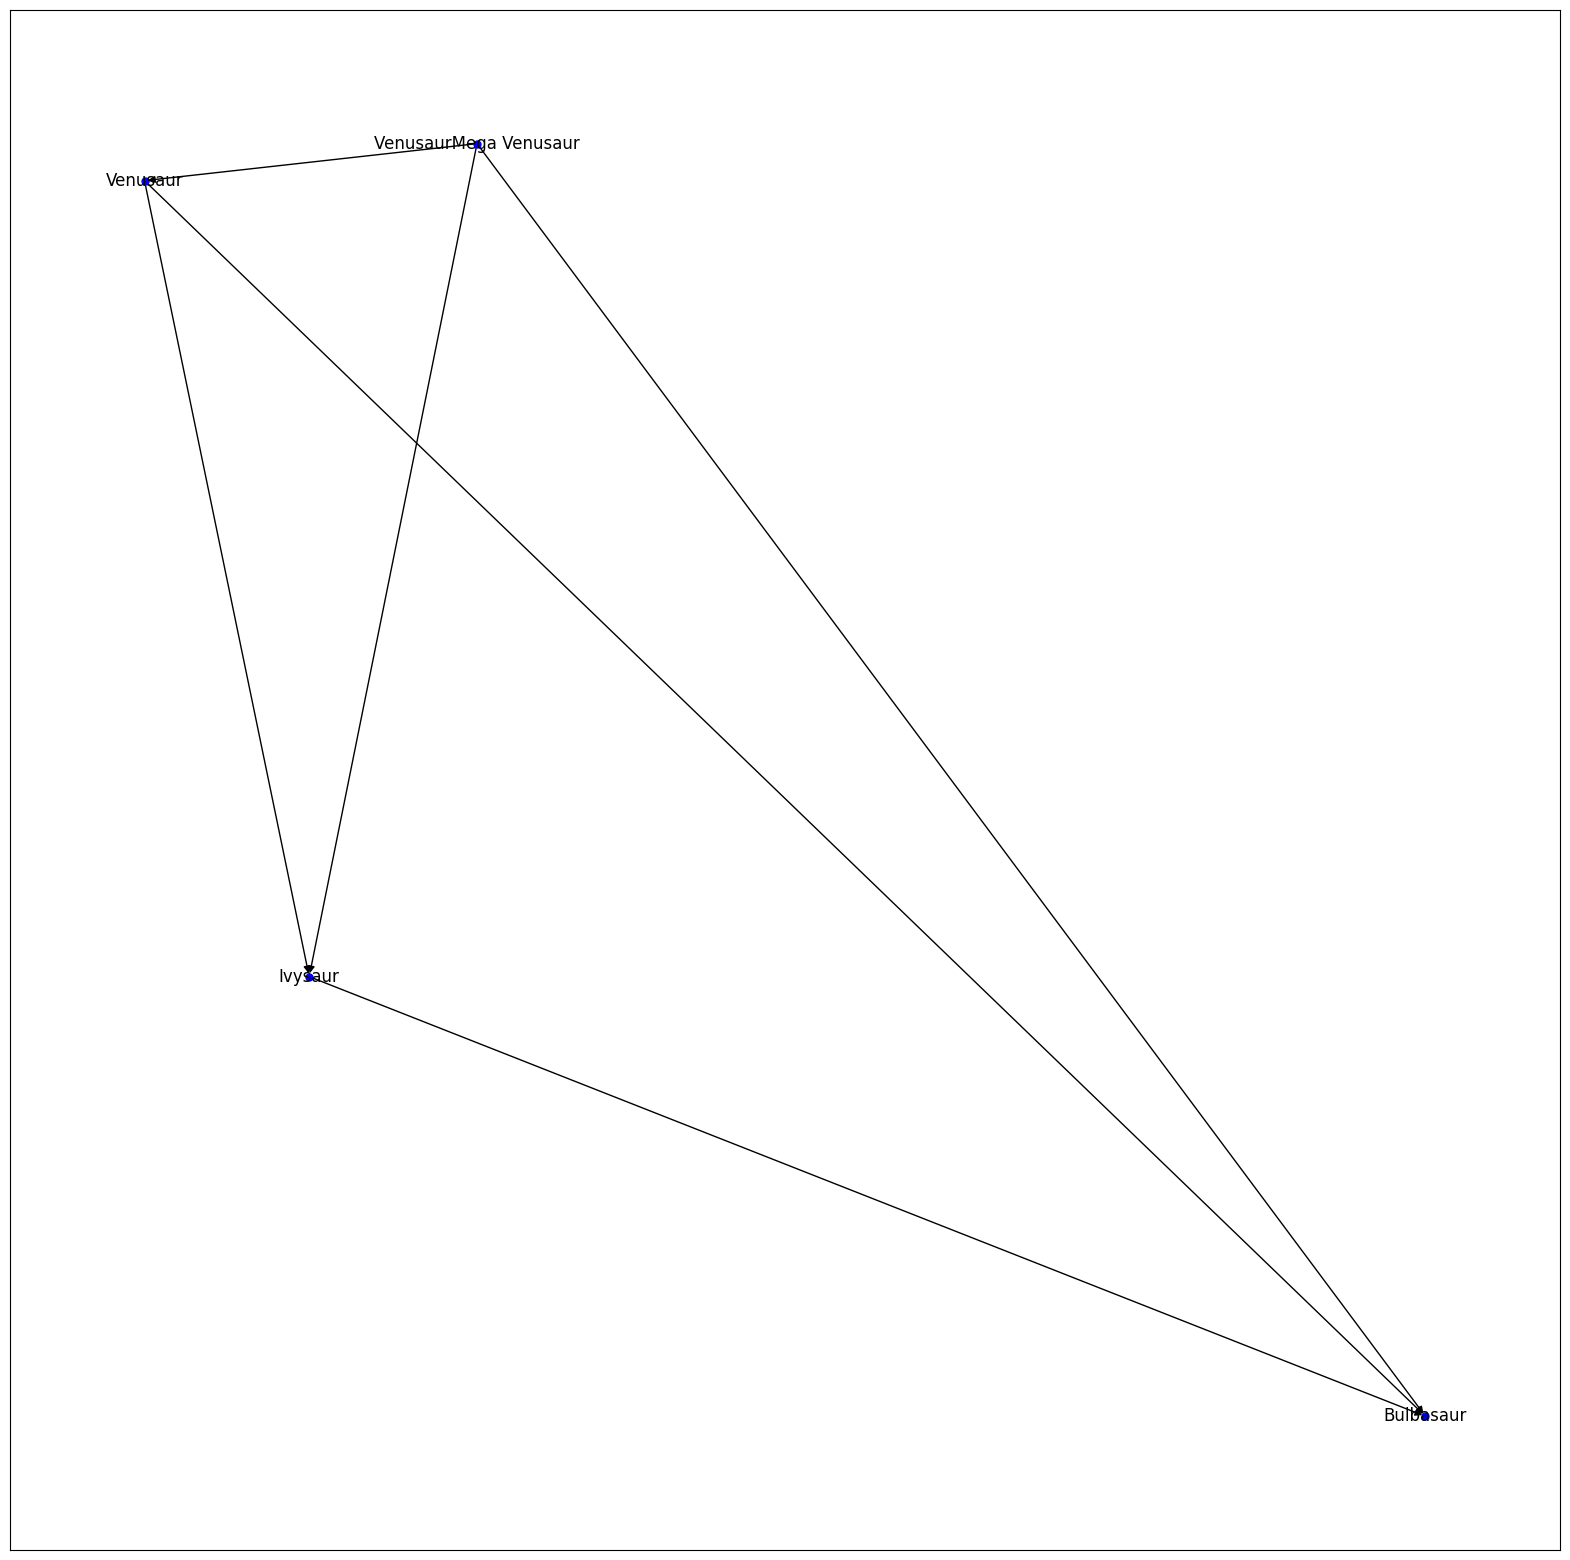

In [ ]:
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(Graph, k=0.15)
nx.draw_networkx(Graph,pos,node_size=25, node_color='blue')
plt.show()


In [ ]:
# prompt: metrics on this dataset

# Calculate basic descriptive statistics for the DataFrame
print(pokemon_df.describe())

# Count the number of unique values in the 'Type 1' column
print("\nNumber of unique types:", pokemon_df['Type 1'].nunique())

# Count the occurrences of each unique value in the 'Type 1' column
print("\nType Counts:\n", pokemon_df['Type 1'].value_counts())

# Calculate the degree centrality of the nodes in the graph
degree_centrality = nx.degree_centrality(Graph)
print("\nDegree Centrality:\n", degree_centrality)

# Calculate the betweenness centrality of the nodes in the graph
betweenness_centrality = nx.betweenness_centrality(Graph)
print("\nBetweenness Centrality:\n", betweenness_centrality)

# Calculate the closeness centrality of the nodes in the graph
closeness_centrality = nx.closeness_centrality(Graph)
print("\nCloseness Centrality:\n", closeness_centrality)

# Calculate the eigenvector centrality of the nodes in the graph
eigenvector_centrality = nx.eigenvector_centrality(Graph)
print("\nEigenvector Centrality:\n", eigenvector_centrality)

# Calculate the average clustering coefficient of the graph
avg_clustering = nx.average_clustering(Graph)
print("\nAverage Clustering Coefficient:", avg_clustering)

# Calculate the diameter of the graph (longest shortest path)
diameter = nx.diameter(Graph)
print("\nDiameter:", diameter)

# Calculate the average shortest path length of the graph
avg_shortest_path = nx.average_shortest_path_length(Graph)
print("\nAverage Shortest Path Length:", avg_shortest_path)

# Calculate the number of edges in the graph
num_edges = Graph.number_of_edges()
print("\nNumber of Edges:", num_edges)

# Calculate the number of nodes in the graph
num_nodes = Graph.number_of_nodes()
print("\nNumber of Nodes:", num_nodes)

            Total         HP      Attack     Defense
count    4.000000   4.000000    4.000000    4.000000
mean   468.250000  66.250000   73.250000   79.500000
std    134.618907  17.017148   22.410935   32.181775
min    318.000000  45.000000   49.000000   49.000000
25%    383.250000  56.250000   58.750000   59.500000
50%    465.000000  70.000000   72.000000   73.000000
75%    550.000000  80.000000   86.500000   93.000000
max    625.000000  80.000000  100.000000  123.000000

Number of unique types: 1

Type Counts:
 Type 1
Grass    4
Name: count, dtype: int64

Degree Centrality:
 {'Bulbasaur': 1.0, 'Ivysaur': 1.0, 'Venusaur': 1.0, 'VenusaurMega Venusaur': 1.0}

Betweenness Centrality:
 {'Bulbasaur': 0.0, 'Ivysaur': 0.0, 'Venusaur': 0.0, 'VenusaurMega Venusaur': 0.0}

Closeness Centrality:
 {'Bulbasaur': 1.0, 'Ivysaur': 0.6666666666666666, 'Venusaur': 0.3333333333333333, 'VenusaurMega Venusaur': 0.0}


PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')